In [1]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

In [2]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [3]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [4]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    #m = m[, trim_left:(ncol(m)-trim_right)]
    #m

    rownames(m) = c("A","C","G","T")
    
    f="helvetica_regular"
    
    p <- ggseqlogo(m, method=method, font=f, ncol=1, size=12) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p 
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
        #p = p + theme(plot.title = element_text(hjust = 0.5, size=20))
    }
    
    p
}

In [5]:
get_plots <- function(subcluster_base_path, input_ls, annotations, rc=F, trim_left=0, trim_right=0, first_yaxis=F) {
    transient_plots = list()
    num_instances_per_motif = 5
    i = 1
    
    for (x in input_ls) {

        submotif = read_nptxt_matrix(sprintf(subcluster_base_path, x))

        #print(submotif)
        #print(max(submotif))
 
        textn = annotations[annotations["key"]==sprintf("0_%d",x)][2]
        transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right, method='custom',
                                         ymin=min(submotif)-0.001, ymax=max(submotif)+0.001, title=textn)

        #transient_plots[[i]] = trim_and_plot(submotif, rc, trim_left, trim_right)

        transient_plots[[i]] = transient_plots[[i]]  
                                    #annotate('text', 
                                    #         x=ncol(submotif), 
                                    #         y=max(submotif), 
                                    #         size=5,
                                    #         label=sprintf("%.2f",as.numeric(textn))
                                    #         )
        theme(plot.margin = unit(c(20,0,0,0), "pt"))
        transient_plots[[i]]


        i = i +1
        }
        
        
    transient_plots

}

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = F

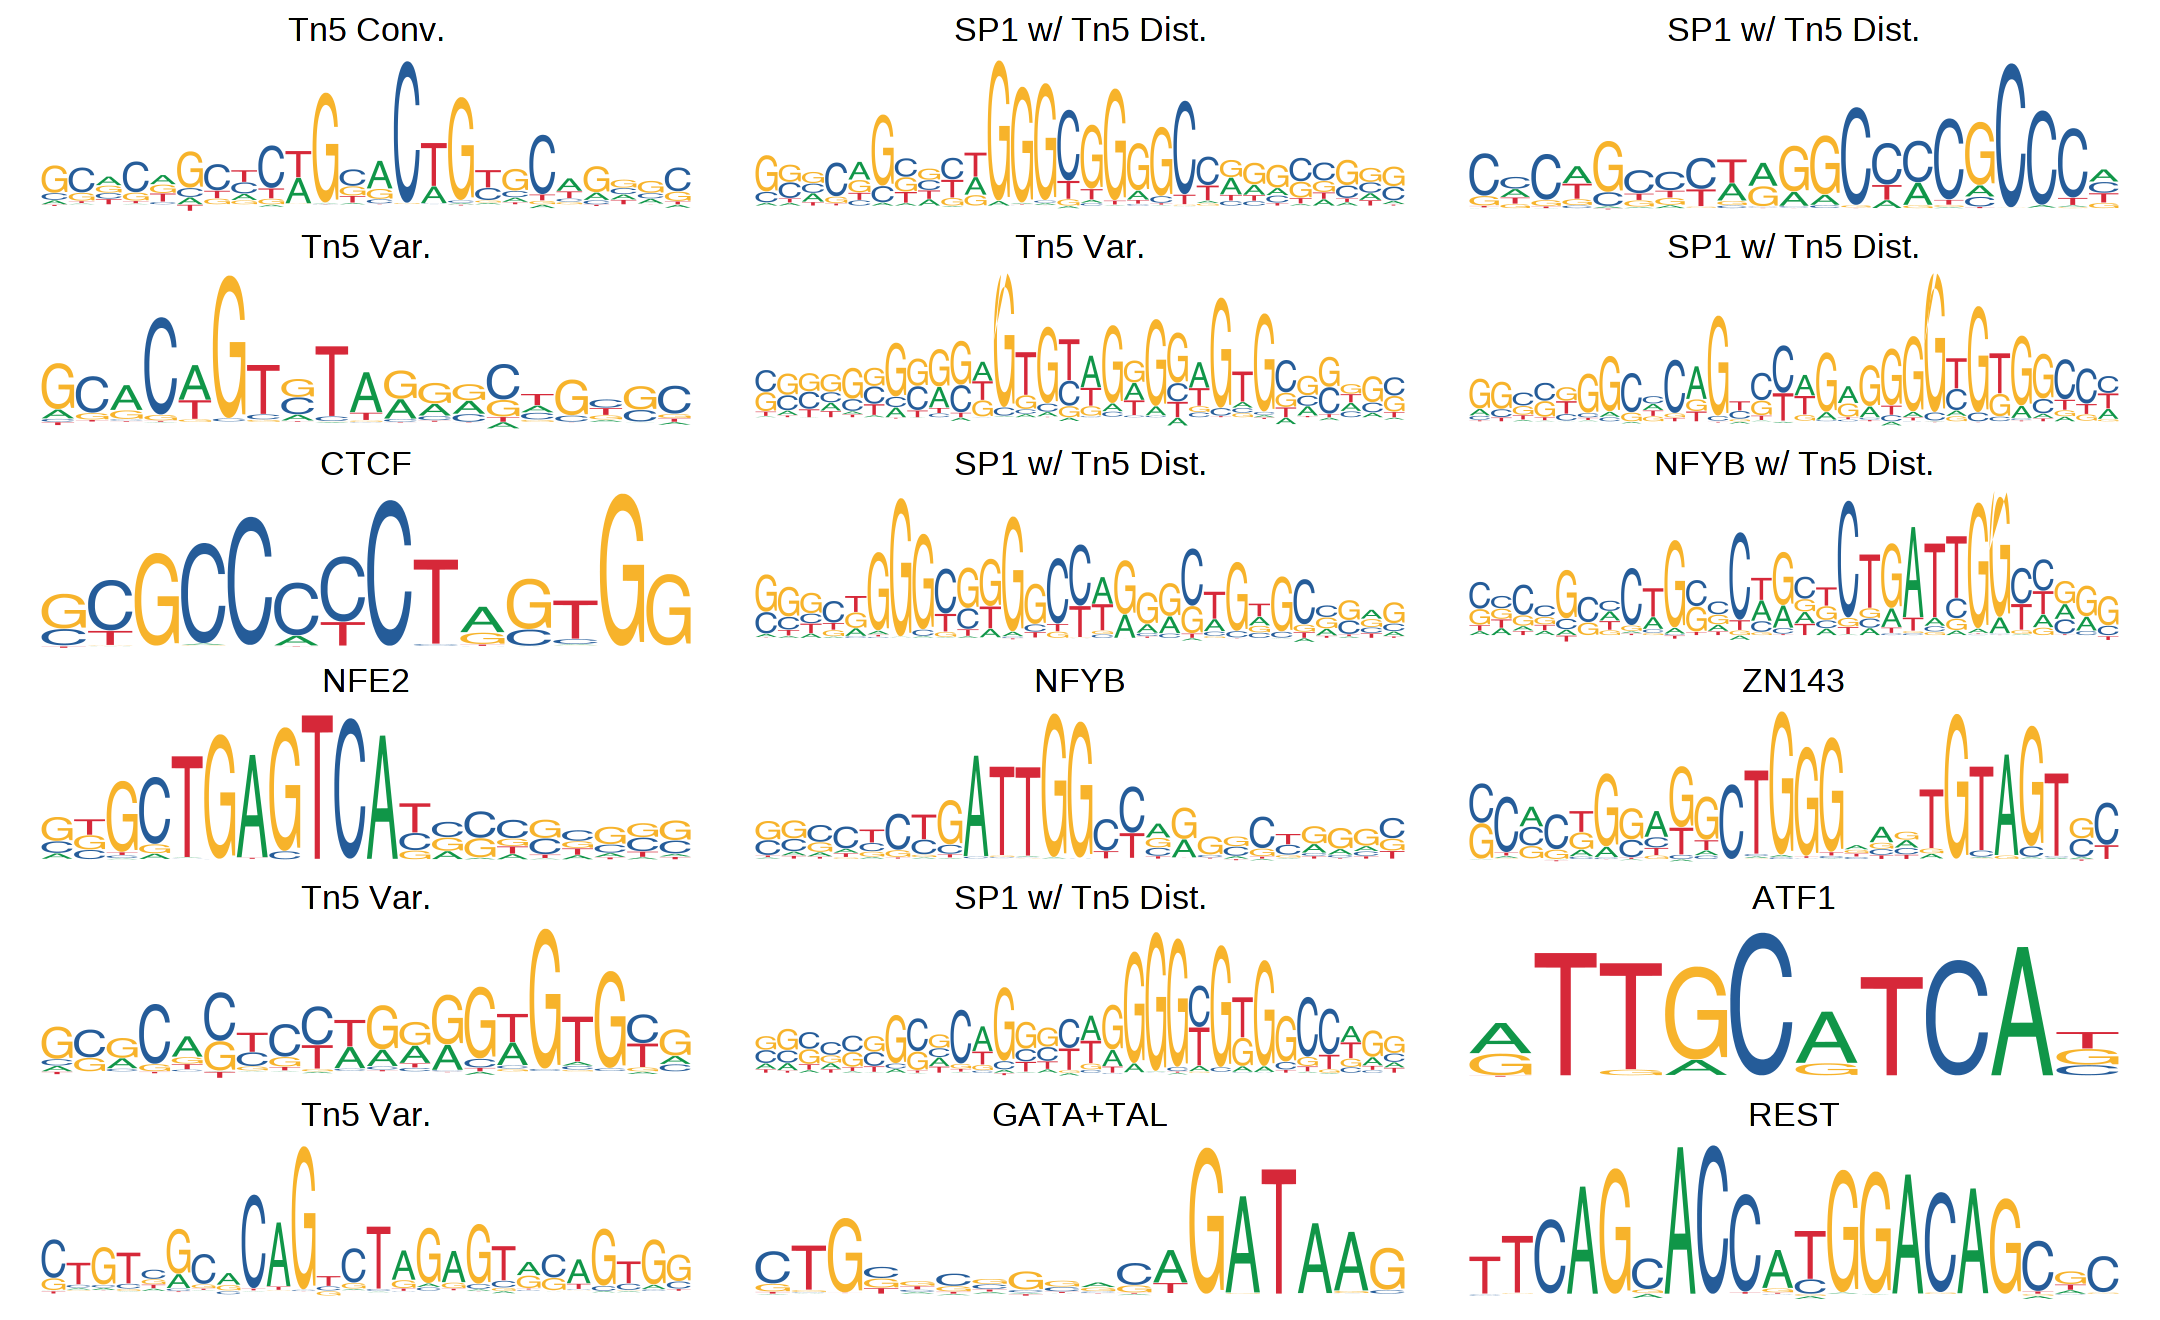

In [6]:

options(repr.plot.width = 18, repr.plot.height = 11)

atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/profile_annotations.csv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots = get_plots("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/profile_0_%d.pfm", seq(0,17), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

#ggsave("k562_profile_modisco.pdf", device = "pdf",  width = 18, height = 6, dpi = 300)


In [7]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/profile_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


In [8]:
new = merge(atac_annotations,atac_counts)[c("label", "counts")]

In [9]:
new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]


In [10]:
new_combined

,label,counts,id,total
,<chr>,<int>,<dbl>,<dbl>
2,CTCF,4514,1,21.539342
3,GATA+TAL,194,1,0.925705
4,NFE2,845,1,4.032066
5,NFYB,285,1,1.359927
6,NFYB w/ Tn5 Dist.,114,1,0.543971
8,SP1 w/ Tn5 Dist.,1159,1,5.530372
9,Tn5 Conv.,6900,1,32.924560
10,Tn5 Var.,6713,1,32.032257


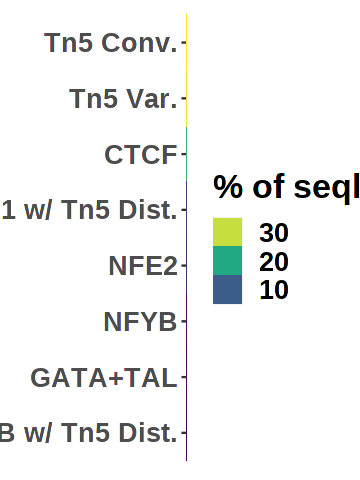

In [11]:
options(repr.plot.width = 3, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total)
, fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=20, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

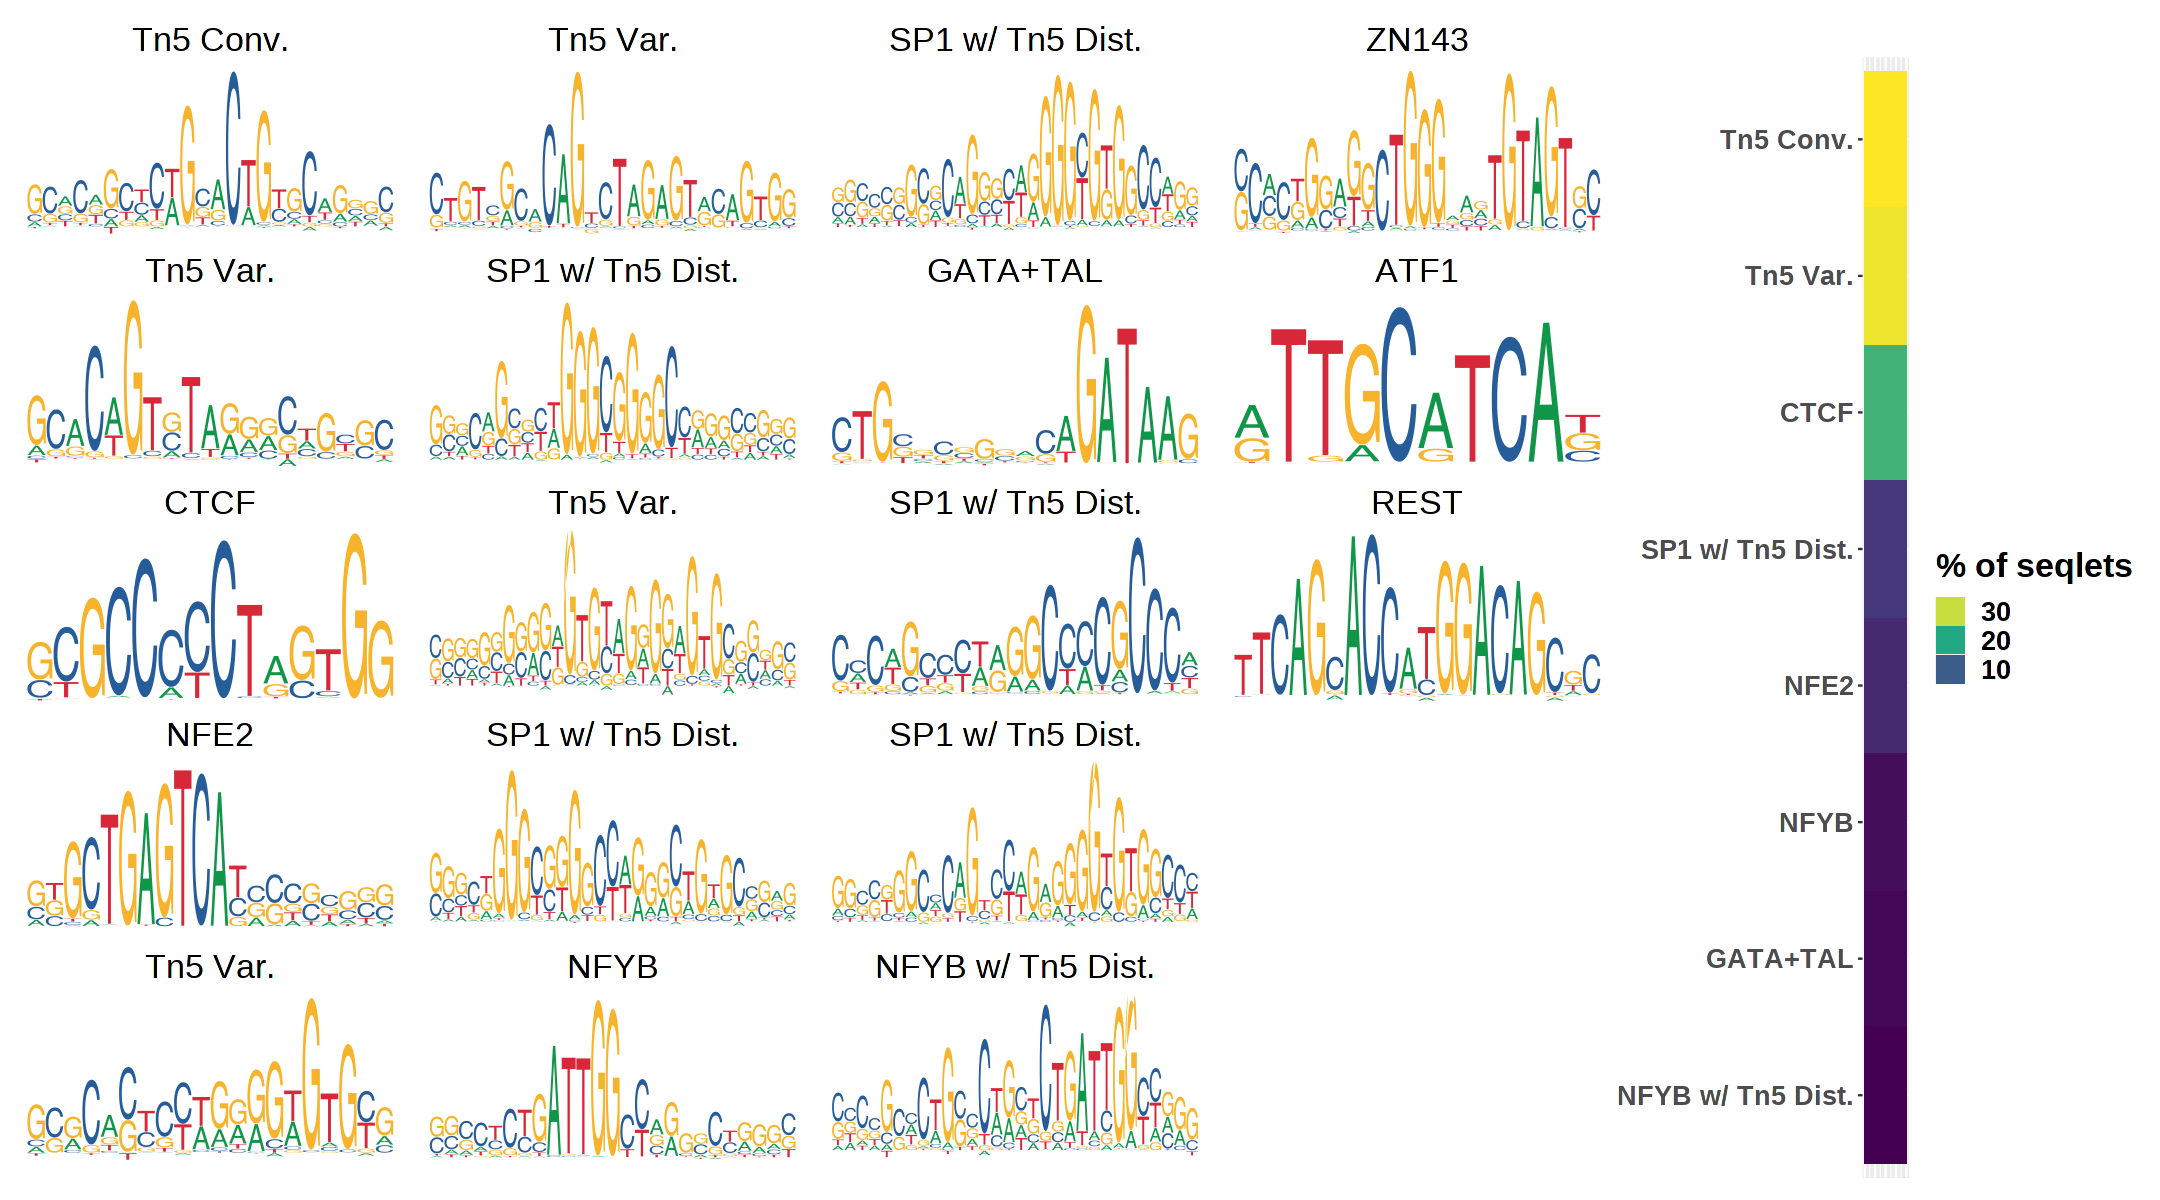

In [12]:
options(repr.plot.width = 18, repr.plot.height = 10)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

ggsave("subfigs/modisco_plots/k562_profile_modisco.pdf", device = "pdf",  width = 18, height = 11, dpi = 300)


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = F

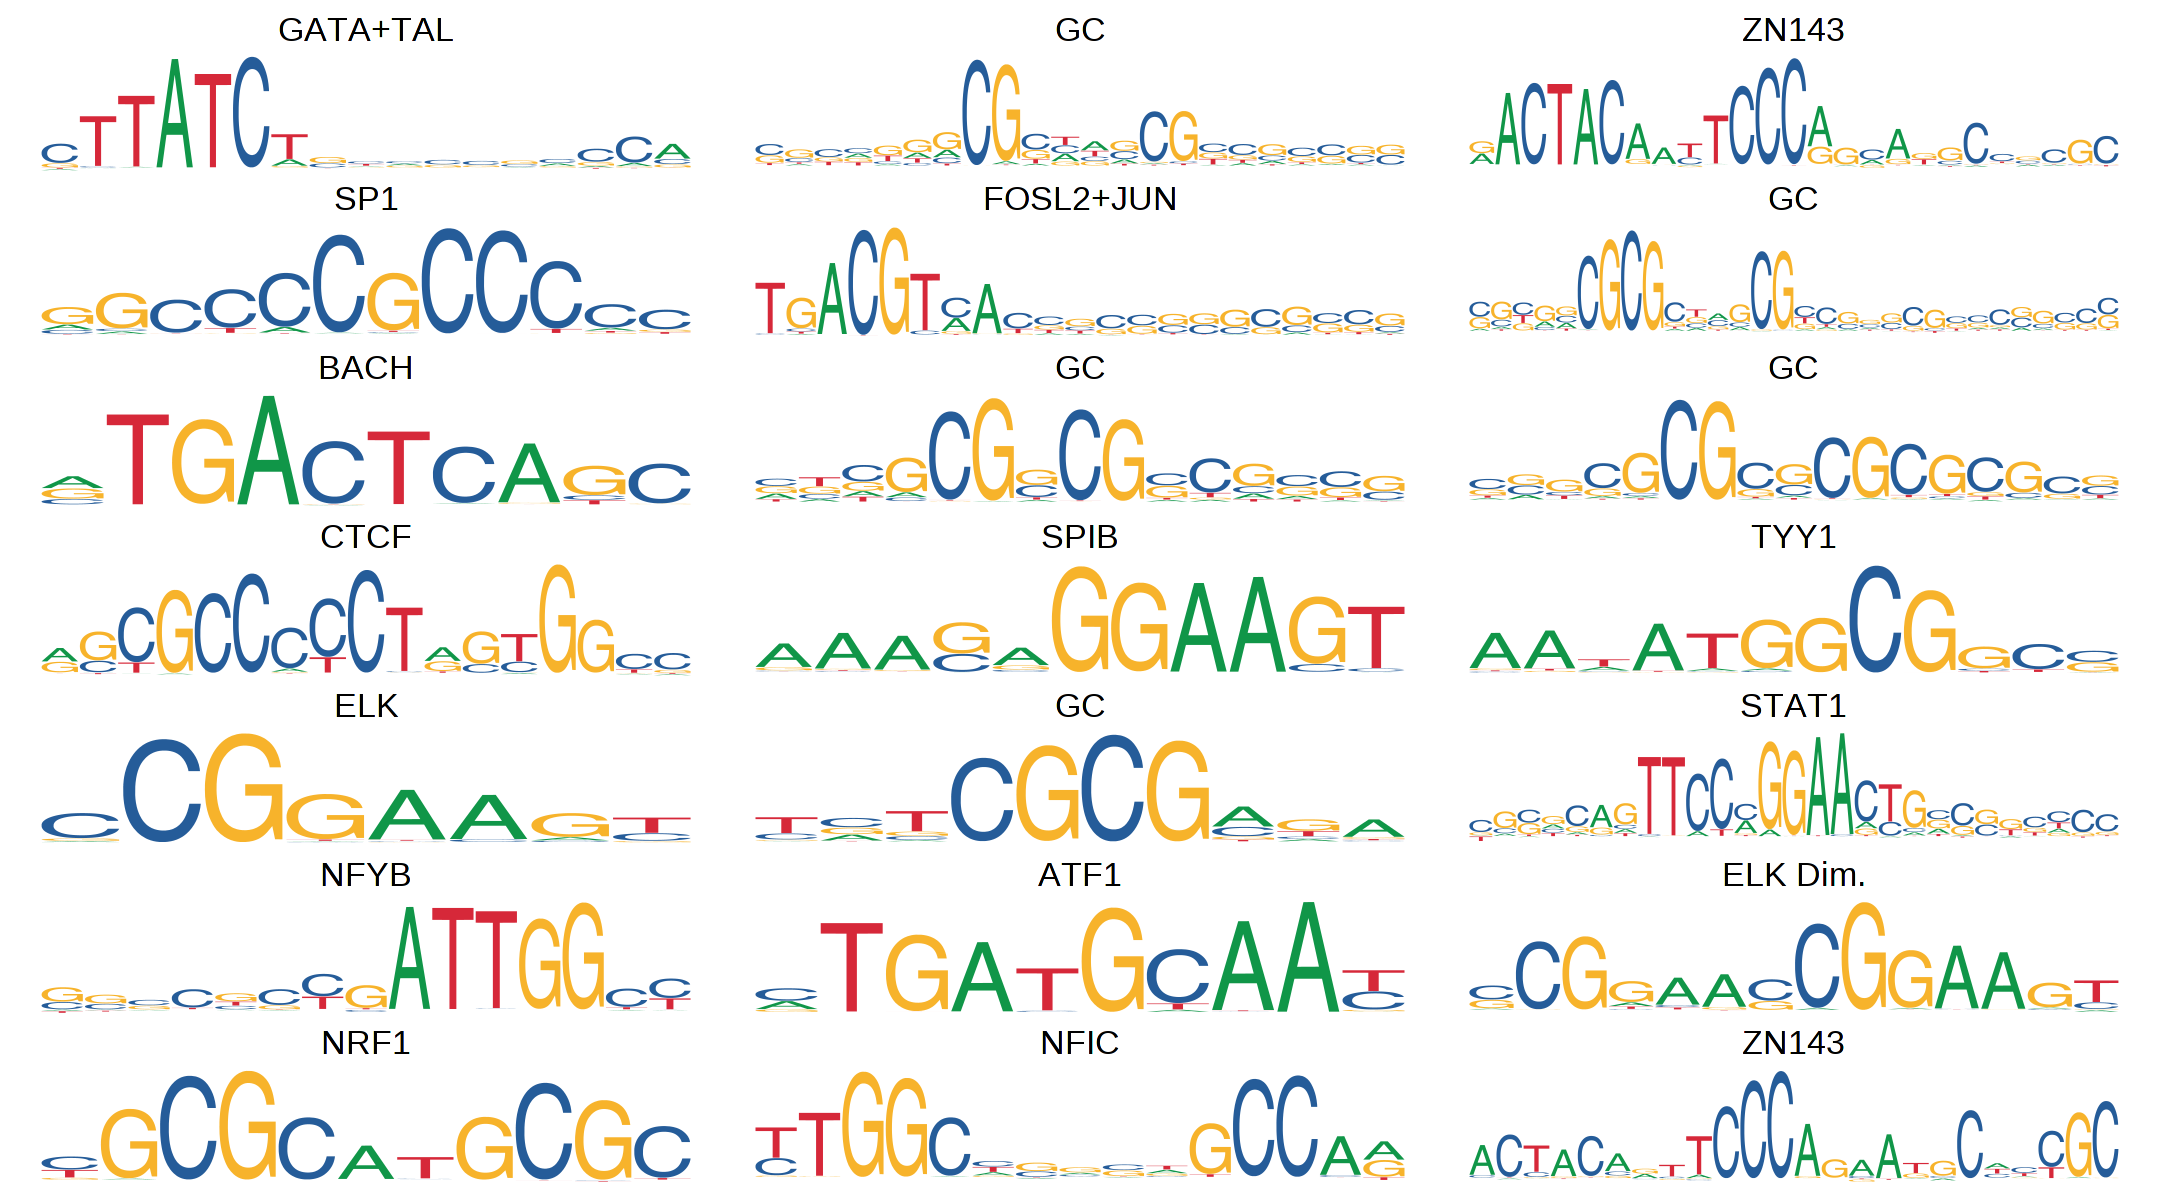

In [13]:

options(repr.plot.width = 18, repr.plot.height = 10)

atac_annotations = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_annotations.csv",sep=",", header=FALSE)

colnames(atac_annotations) = c("key","label")

all_plots = get_plots("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_0_%d.pfm", seq(0,20), atac_annotations,
                       rc=F, trim_left=0, trim_right=0, first_yaxis = F)
#do.call(gridExtra::grid.arrange, c(all_plots, ncol=1))

wrap_plots(all_plots, ncol=3, byrow=FALSE)

#ggsave("k562_counts_modisco.pdf", device = "pdf",  width = 6, height = 6, dpi = 300)


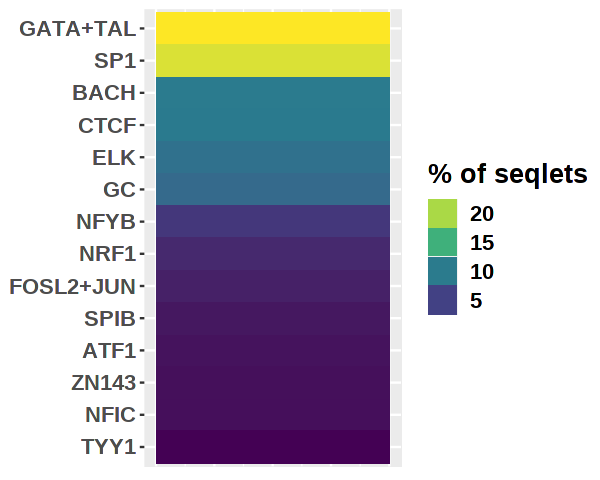

In [14]:
atac_counts = read.table("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/K562/uncorrected_model_08.22.2022_filters_512_dil_8/counts_counts.csv",sep=",", header=FALSE)

colnames(atac_counts) = c("key","counts")


new = merge(atac_annotations,atac_counts, all=FALSE)[c("label", "counts")]

new_combined = aggregate(counts~.,new,FUN=sum)
new_combined["id"] = c(1)
new_combined["total"] = new_combined["counts"]*100.0/sum(new_combined["counts"])

new_combined = new_combined[new_combined["total"]>0.5,]

#print(new_combined)
options(repr.plot.width = 5, repr.plot.height = 4)

p = ggplot(new_combined, aes(x=id, y=reorder(label, total), fill=total)) +
geom_tile() +
scale_fill_viridis_c() + 
theme(axis.ticks.x = element_blank(),
axis.text.x = element_blank(),
axis.title.y = element_blank(),
axis.title.x = element_blank(),
text = element_text(size=16, face="bold")) + guides(fill=guide_legend(title="% of seqlets", reverse=TRUE))

p

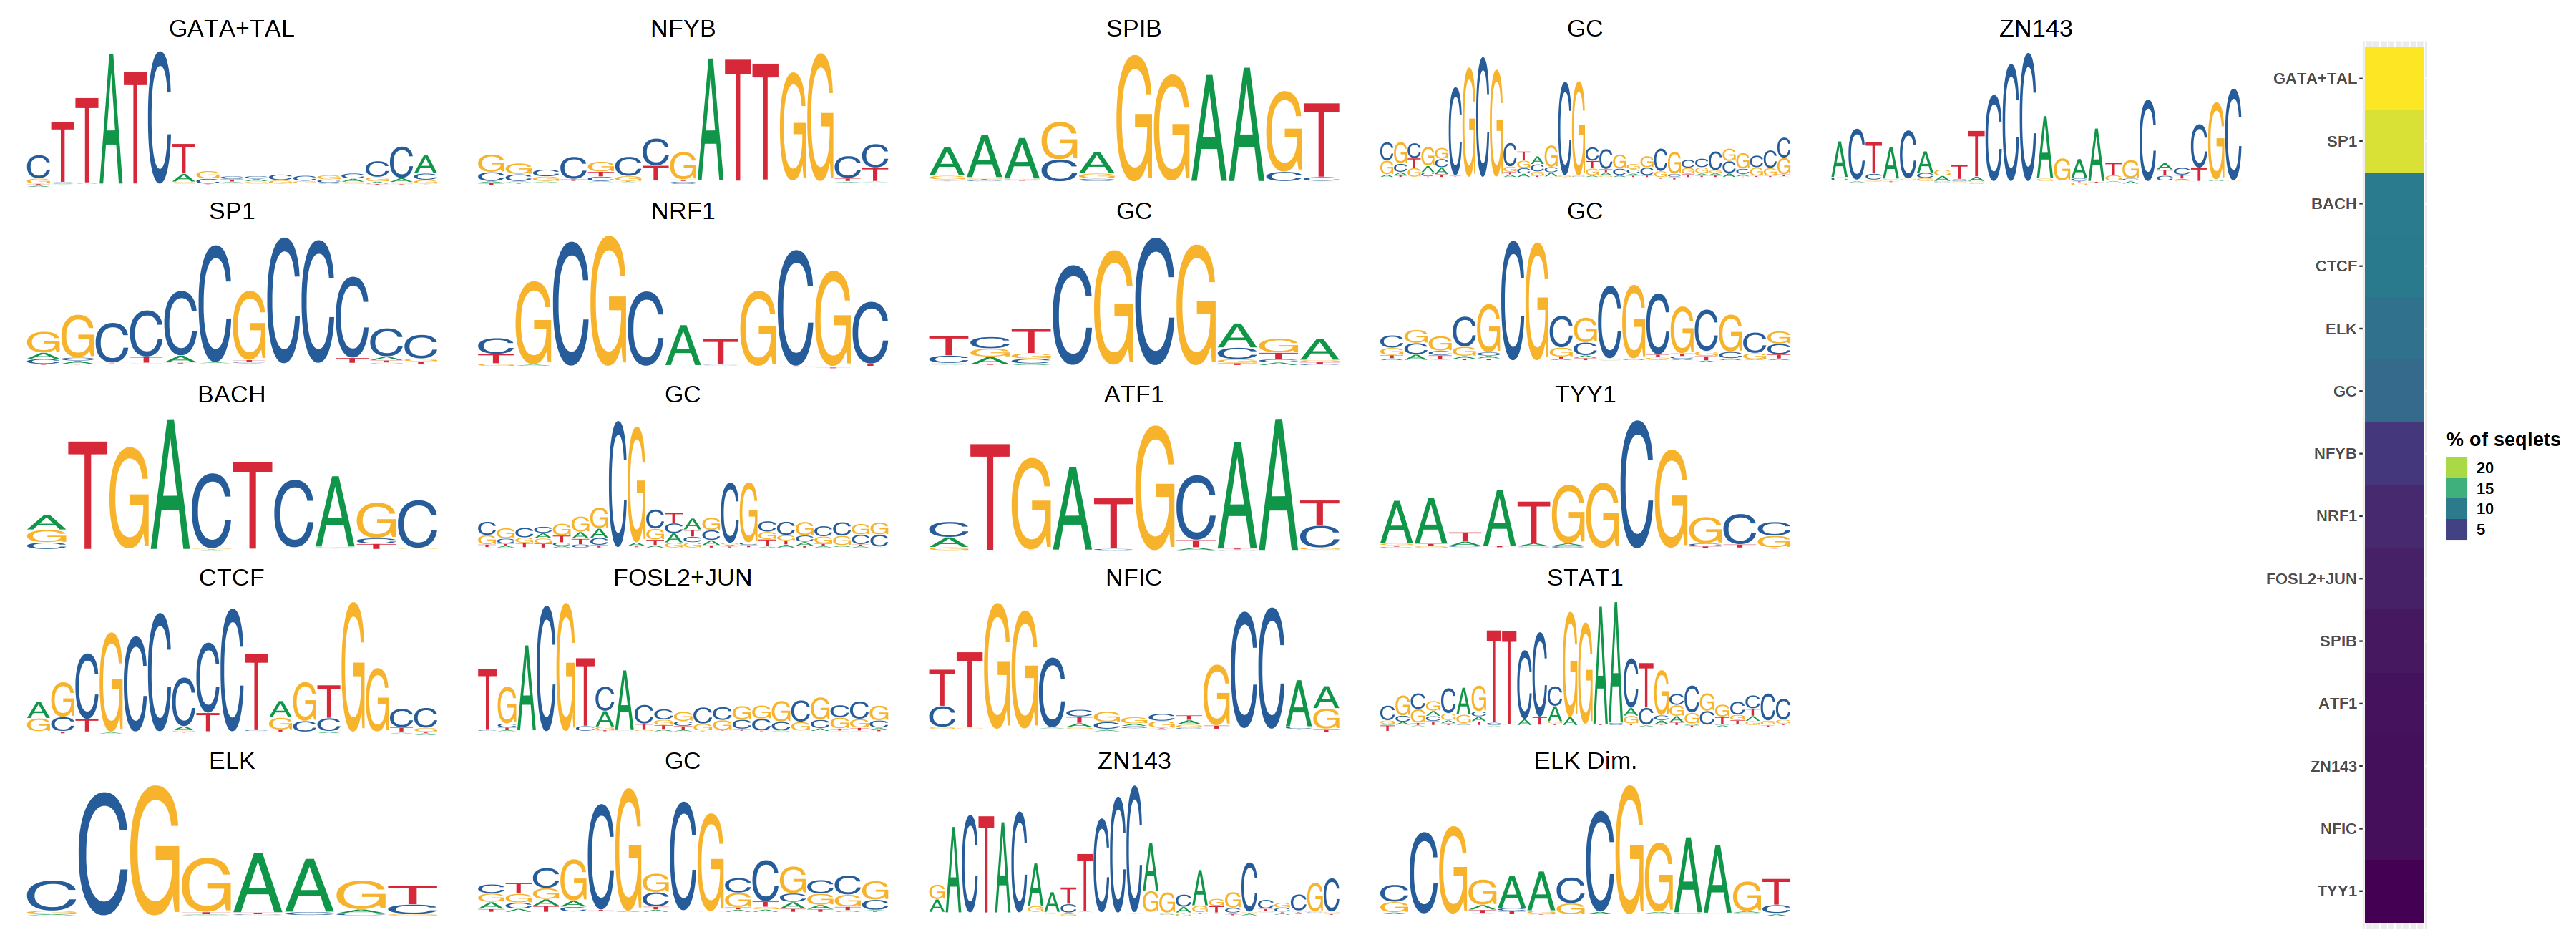

In [16]:
options(repr.plot.width = 30, repr.plot.height = 11)

wrap_plots(wrap_plots(all_plots, nrow=5, byrow=FALSE), p, widths=c(17.5,0.5))

ggsave("subfigs/modisco_plots/k562_counts_modisco.pdf", device = "pdf",  width = 18, height = 11, dpi = 300)
